#📌 Extracão

In [ ]:
import pandas as pd
import json
#abrir o arquivo json.
with open("TelecomX_Data.json","r") as f:
    data = json.load(f)
    
# json em dataFrame.
df = pd.json_normalize(data)

# Visualizar.
df.head()    

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [ ]:
# Corrigir tipo de dados.
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

#Verificar dados nulo.
print('Nulos por coluna:\n',df.isnull().sum())

# Remover duplicatas.
df.drop_duplicates(inplace=True)

# Visualizar estrutura.
df.info()

Nulos por coluna:
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn           

#📊 Carga e análise

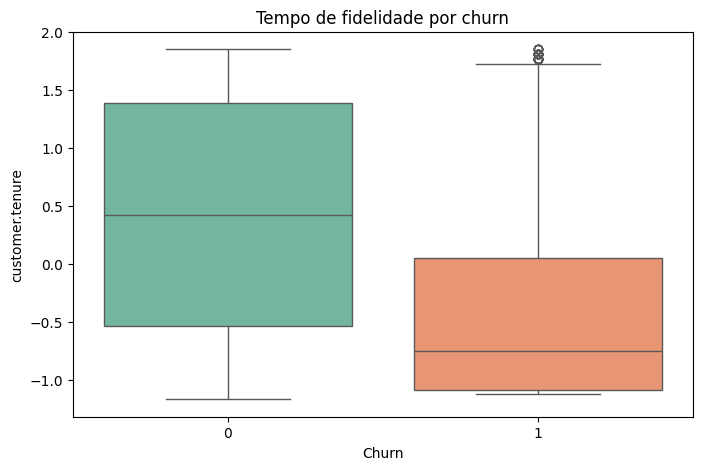

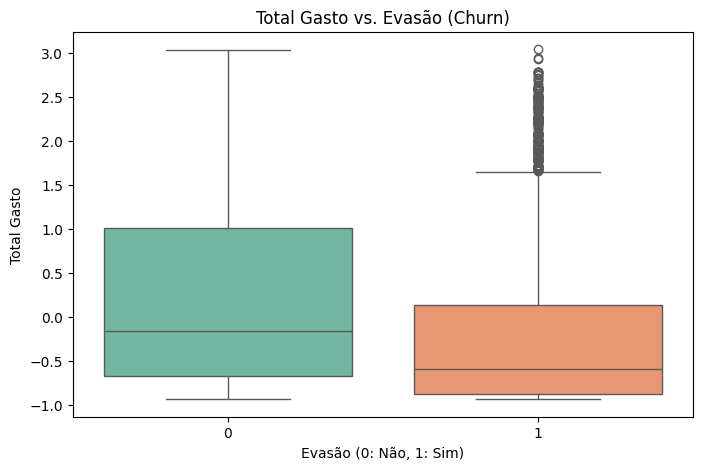

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Para garantir que pd está importado se este for um snippet

# Supondo que 'df_plot' é o DataFrame que você está usando após o balanceamento e padronização.
# Se o seu boxplot estiver referenciando 'df', e você quer usar os dados processados,
# certifique-se de usar df_plot como fizemos nas etapas anteriores.

# Boxplot para Tempo de fidelidade por churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer.tenure', data=df_plot, hue='Churn', legend=False, palette='Set2')
plt.title('Tempo de fidelidade por churn')
plt.show()

# Boxplot para Total gasto por churn (se aplicável ao seu código)
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_plot, hue='Churn', legend=False, palette='Set2')
plt.title('Total Gasto vs. Evasão (Churn)')
plt.xlabel('Evasão (0: Não, 1: Sim)')
plt.ylabel('Total Gasto')
plt.show()

Churn                           0     1  churnRate (%)
Contract_Type_Reconstructed                           
Month-to-month               2210  4381      66.469428
One year                     1307   666      33.755702
Two year                     1647   117       6.632653


C:\Users\Dell\AppData\Local\Temp\ipykernel_6828\2613178705.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer.tenure', data=df_plot, palette='Set2')


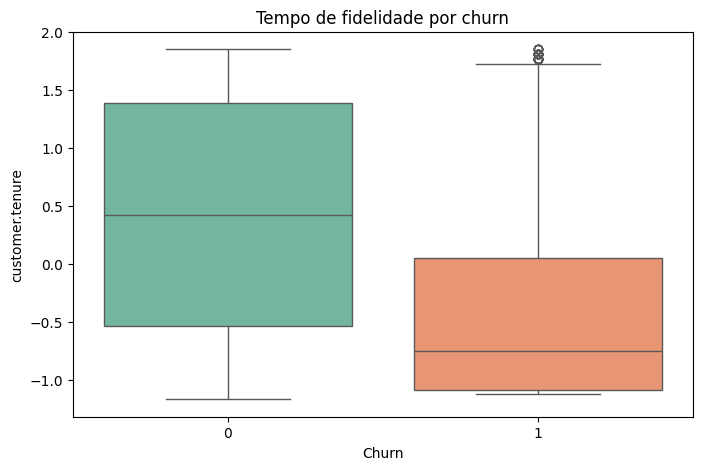

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def get_contract_type(row):
    if 'account.Contract_One year' in row.index and row['account.Contract_One year'] == 1:
        return 'One year'
    if 'account.Contract_Two year' in row.index and row['account.Contract_Two year'] == 1:
        return 'Two year'
    return 'Month-to-month'

if 'account.Contract_One year' in df_plot.columns and 'account.Contract_Two year' in df_plot.columns:
    df_plot['Contract_Type_Reconstructed'] = df_plot.apply(get_contract_type, axis=1)

    churn_contrato = df_plot.groupby(['Contract_Type_Reconstructed', 'Churn']).size().unstack(fill_value=0)
    churn_contrato['churnRate (%)'] = (churn_contrato[1] / (churn_contrato[1] + churn_contrato[0])) * 100
    print(churn_contrato.sort_values('churnRate (%)', ascending=False))
else:
    print("Colunas de contrato não encontradas para reconstrução. Verifique o one-hot encoding.")


plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer.tenure', data=df_plot, palette='Set2')
plt.title('Tempo de fidelidade por churn')
plt.show()

## Analise de correlação

In [17]:
df['Churn'].value_counts(normalize=True)
from imblearn.over_sampling import SMOTE

X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
from sklearn.preprocessing import StandardScaler

numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

scaler = StandardScaler()
X_balanced[numerical_cols] = scaler.fit_transform(X_balanced[numerical_cols])

## Correlção e seleção de variavesi

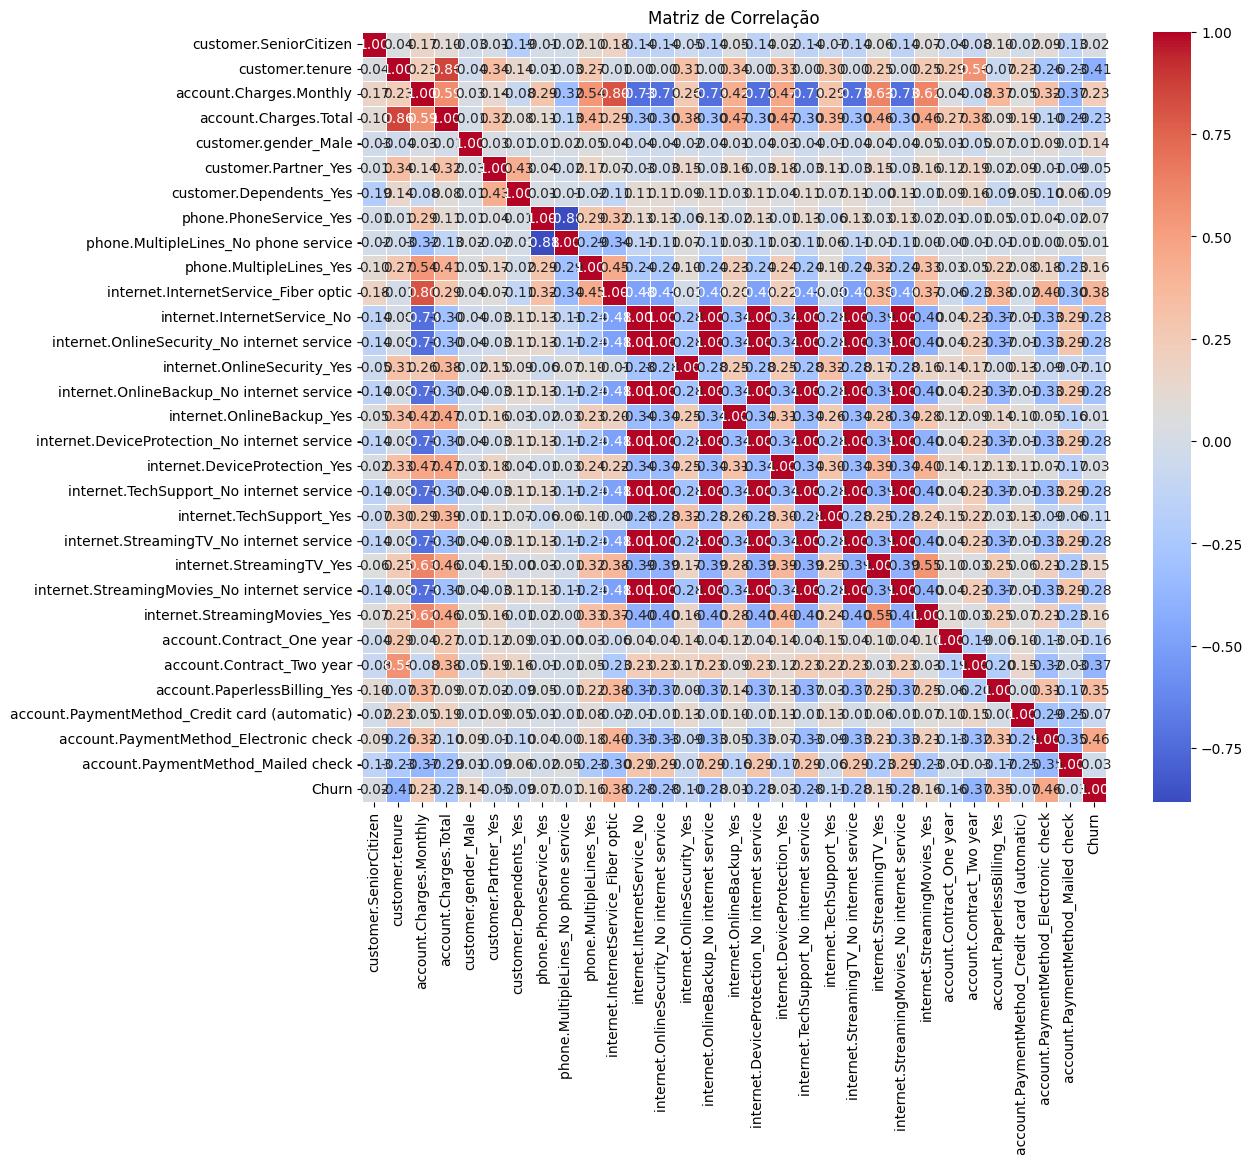

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_plot = pd.concat([X_balanced, y_balanced], axis=1)

correlation_matrix = df_plot.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

## Modelagem preditiva

=== Avaliação do Modelo de Regressão Logística ===
Acurácia: 0.8177
Precisão: 0.8096
Recall: 0.8330
F1-score: 0.8211

Matriz de Confusão:


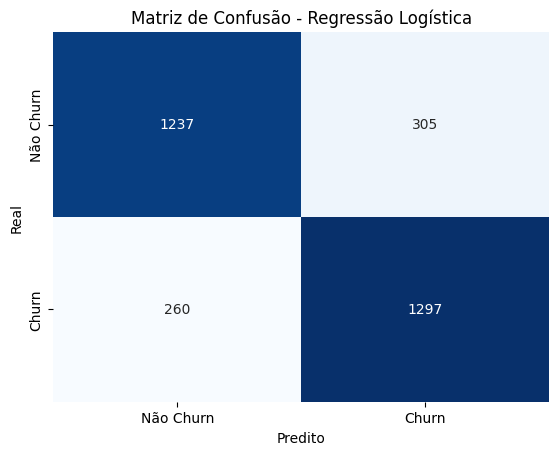


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1542
           1       0.81      0.83      0.82      1557

    accuracy                           0.82      3099
   macro avg       0.82      0.82      0.82      3099
weighted avg       0.82      0.82      0.82      3099


=== Avaliação do Modelo Random Forest ===
Acurácia: 0.8454
Precisão: 0.8407
Recall: 0.8542
F1-score: 0.8474

Matriz de Confusão:


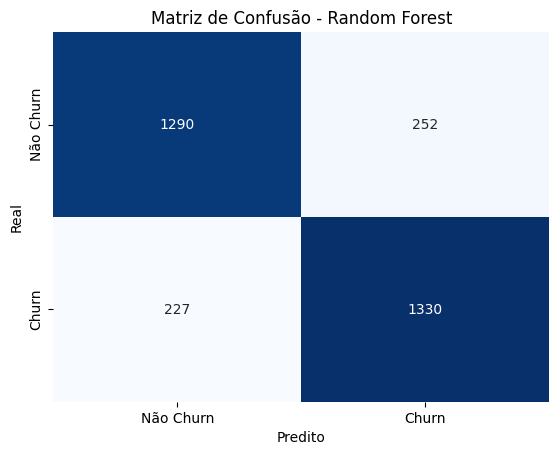


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1542
           1       0.84      0.85      0.85      1557

    accuracy                           0.85      3099
   macro avg       0.85      0.85      0.85      3099
weighted avg       0.85      0.85      0.85      3099


=== Comparativo de Desempenho (Treino vs Teste) ===
Regressão Logística - Treino Acurácia: 0.8268086872319823
Regressão Logística - Teste Acurácia: 0.8176831235882542
Random Forest - Treino Acurácia: 0.9991700096832203
Random Forest - Teste Acurácia: 0.845434010971281


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_log_reg = log_reg_model.predict(X_test)

print("=== Avaliação do Modelo de Regressão Logística ===")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_log_reg):.4f}")
print("\nMatriz de Confusão:")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log_reg))

y_pred_rf = rf_model.predict(X_test)

print("\n=== Avaliação do Modelo Random Forest ===")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nMatriz de Confusão:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))

y_train_pred_log_reg = log_reg_model.predict(X_train)
y_train_pred_rf = rf_model.predict(X_train)

print("\n=== Comparativo de Desempenho (Treino vs Teste) ===")
print("Regressão Logística - Treino Acurácia:", accuracy_score(y_train, y_train_pred_log_reg))
print("Regressão Logística - Teste Acurácia:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest - Treino Acurácia:", accuracy_score(y_train, y_train_pred_rf))
print("Random Forest - Teste Acurácia:", accuracy_score(y_test, y_pred_rf))

## Interpretação e conclusão

=== Importância das Variáveis (Regressão Logística - Magnitude dos Coeficientes) ===
internet.InternetService_Fiber optic             5.070849
account.Charges.Monthly                          5.039740
phone.PhoneService_Yes                           3.546487
customer.tenure                                  2.026545
internet.StreamingTV_Yes                         1.887731
internet.StreamingMovies_Yes                     1.871456
account.PaymentMethod_Electronic check           1.322025
phone.MultipleLines_Yes                          1.296242
account.Charges.Total                            1.183986
account.Contract_Two year                        1.019504
account.PaymentMethod_Mailed check               0.849223
internet.DeviceProtection_Yes                    0.840894
phone.MultipleLines_No phone service             0.835910
internet.OnlineBackup_Yes                        0.811296
account.PaymentMethod_Credit card (automatic)    0.788783
internet.OnlineSecurity_Yes                  

C:\Users\Dell\AppData\Local\Temp\ipykernel_6828\1556818255.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_reg_importances_sorted.head(15).values, y=log_reg_importances_sorted.head(15).index, palette='viridis')


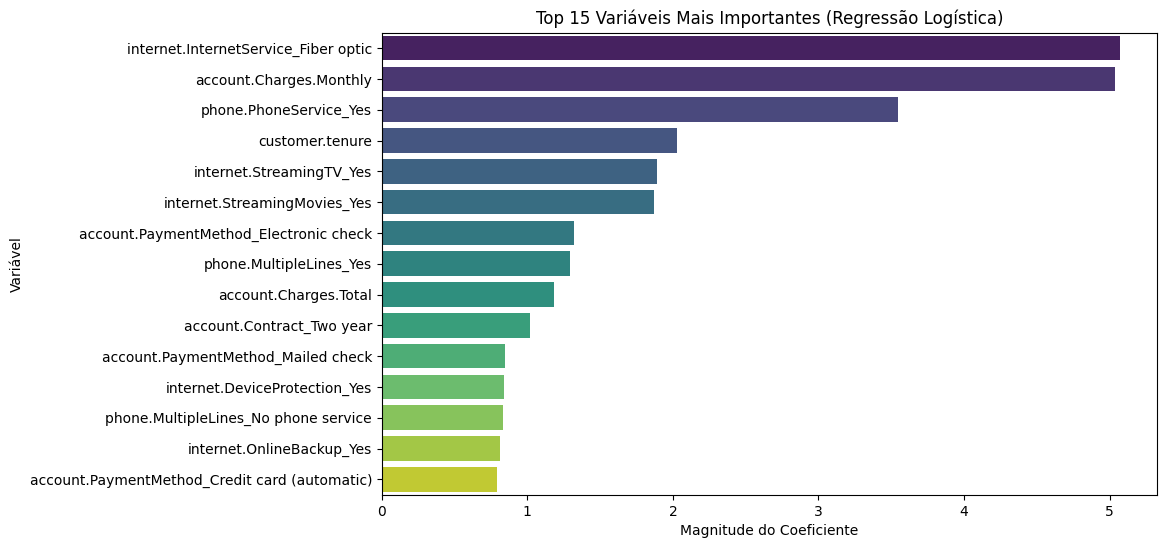


=== Importância das Variáveis (Random Forest) ===
account.Charges.Total                            0.164127
customer.tenure                                  0.155102
account.Charges.Monthly                          0.130584
account.PaymentMethod_Electronic check           0.103711
internet.InternetService_Fiber optic             0.049217
account.Contract_Two year                        0.044846
account.PaperlessBilling_Yes                     0.039484
customer.gender_Male                             0.024723
phone.MultipleLines_Yes                          0.022939
account.Contract_One year                        0.021814
internet.StreamingTV_Yes                         0.018645
internet.StreamingMovies_Yes                     0.018635
customer.Partner_Yes                             0.018331
account.PaymentMethod_Credit card (automatic)    0.017833
internet.OnlineSecurity_Yes                      0.017150
internet.OnlineBackup_Yes                        0.016560
account.PaymentMethod

C:\Users\Dell\AppData\Local\Temp\ipykernel_6828\1556818255.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances_sorted.head(15).values, y=rf_importances_sorted.head(15).index, palette='magma')


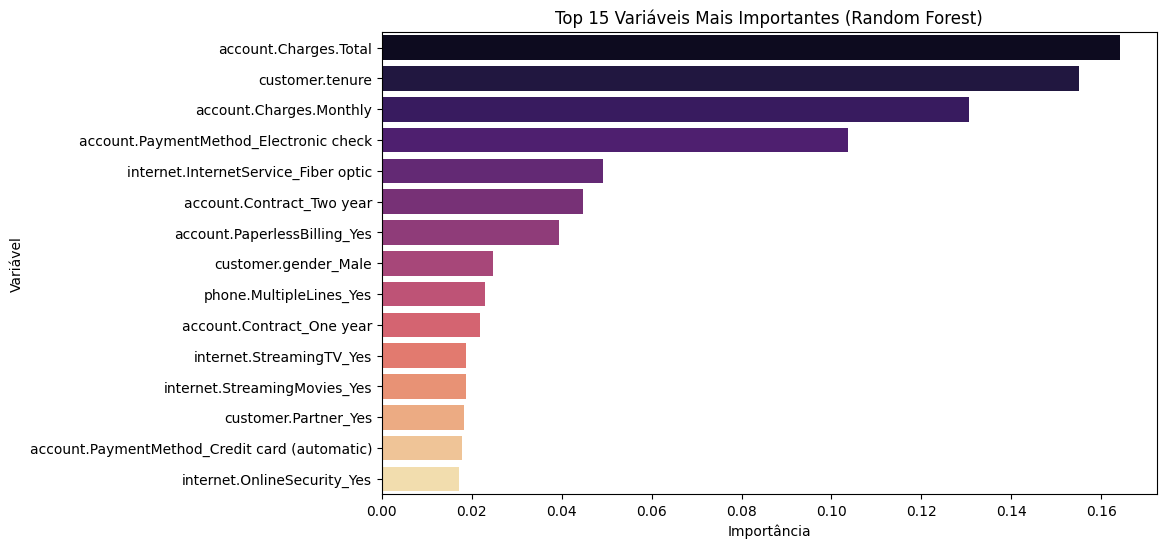

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X_train.columns

# Importância das Variáveis para Regressão Logística
log_reg_importances = pd.Series(log_reg_model.coef_[0], index=feature_names)
log_reg_importances_sorted = log_reg_importances.abs().sort_values(ascending=False)

print("=== Importância das Variáveis (Regressão Logística - Magnitude dos Coeficientes) ===")
print(log_reg_importances_sorted)

plt.figure(figsize=(10, 6))
sns.barplot(x=log_reg_importances_sorted.head(15).values, y=log_reg_importances_sorted.head(15).index, palette='viridis')
plt.title('Top 15 Variáveis Mais Importantes (Regressão Logística)')
plt.xlabel('Magnitude do Coeficiente')
plt.ylabel('Variável')
plt.show()

# Importância das Variáveis para Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=feature_names)
rf_importances_sorted = rf_importances.sort_values(ascending=False)

print("\n=== Importância das Variáveis (Random Forest) ===")
print(rf_importances_sorted)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances_sorted.head(15).values, y=rf_importances_sorted.head(15).index, palette='magma')
plt.title('Top 15 Variáveis Mais Importantes (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

#📄Relatorio Final